In [1]:
import numpy as np
import pandas as pd

In [2]:

import keras
import tensorflow as tf

Using TensorFlow backend.
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

# Считывание данных
Данные взяты с https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29
Все данные уже нормализованы.

Age (Real) is age of participant and has one of the values:

| Value | Meaning | Cases | Fraction |
| --- | --- | --- | --- |
|-0.95197| 18-24| 643| 34.11%|
|-0.07854 |25-34 |481| 25.52%|
|0.49788| 35-44| 356| 18.89%|
|1.09449| 45-54| 294| 15.60%|
|1.82213| 55-64| 93| 4.93%|
|2.59171| 65+| 18| 0.95%|

Gender:
- 0.48246 Female
- -0.48246 Male


Education:
- -2.43591 Left school before 16 years
- -1.73790 Left school at 16 years
- -1.43719 Left school at 17 years
- -1.22751 Left school at 18 years 
- -0.61113 Some college or university, no certificate or degree
- -0.05921 Professional certificate/ diploma 
- 0.45468 University degree 
- 1.16365 Masters degree 
- 1.98437 Doctorate degree 

Country:
- -0.09765 Australia 54 2.86%
- 0.24923 Canada 87 4.62%
- -0.46841 New Zealand 5 0.27%
- -0.28519 Other 118 6.26%
- 0.21128 Republic of Ireland 20 1.06%
- 0.96082 UK 1044 55.38%
- -0.57009 USA 557 29.55%

Ethnicity:
- -0.50212 Asian 26 1.38%
- -1.10702 Black 33 1.75%
- 1.90725 Mixed-Black/Asian 3 0.16%
- 0.12600 Mixed-White/Asian 20 1.06%
- -0.22166 Mixed-White/Black 20 1.06%
- 0.11440 Other 63 3.34%
- -0.31685 White 1720 91.25%

Результаты психологических тестов. Чем больше число, тем выше характеристика.
- Nscore is NEO-FFI-R Neuroticism
- Escore - (Real) is NEO-FFI-R Extraversion
- Oscore - (Real) is NEO-FFI-R Openness to experience
- Ascore - (Real) is NEO-FFI-R Agreeableness
- Cscore - (Real) is NEO-FFI-R Conscientiousness
- Impulsive - (Real) is impulsiveness measured by BIS-11
- SS - (Real) is sensation seeing measured by ImpSS

Дальше столбцы по веществам <br>
Условные обозначения в этих столбцах:
- CL0 Never Used 
- CL1 Used over a Decade Ago 
- CL2 Used in Last Decade 
- CL3 Used in Last Year
- CL4 Used in Last Month 
- CL5 Used in Last Week 
- CL6 Used in Last Day

In [3]:
data = pd.read_csv('drug_consumption.data')

In [4]:
data.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
#Убраны лишние вещества (кроме шоколада, алкоголя, кофеина и никотина)
work_data = data.drop(['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms', 'Semer', 'VSA', 'Country', 'Ethnicity', 'ID'], axis=1)
work_data.columns

Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Caff', 'Choc', 'Meth',
       'Nicotine'],
      dtype='object')

In [6]:
#Убраны лишние вещества (кроме шоколада, алкоголя, кофеина и никотина) и псилохологические тесты
simple_data = data.drop(['Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms',
       'Semer', 'VSA', 'Country', 'Ethnicity', 'ID'], axis=1)
simple_data.columns

Index(['Age', 'Gender', 'Education', 'Alcohol', 'Caff', 'Choc', 'Meth',
       'Nicotine'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

work_data.hist(bins=50, figsize=(20 ,15))
plt.show()

<Figure size 2000x1500 with 12 Axes>

CL0    1429
CL3     149
CL2      97
CL6      73
CL4      50
CL5      48
CL1      39
Name: Meth, dtype: int64


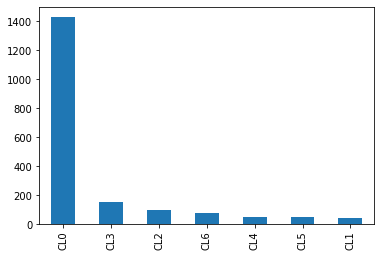

CL6    807
CL5    683
CL4    296
CL3     54
CL0     32
CL2     10
CL1      3
Name: Choc, dtype: int64


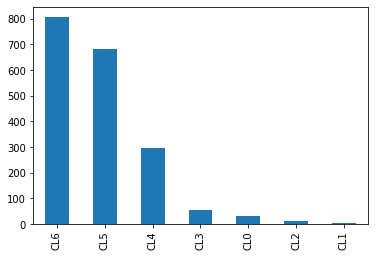

CL6    1385
CL5     273
CL4     106
CL3      60
CL0      27
CL2      24
CL1      10
Name: Caff, dtype: int64


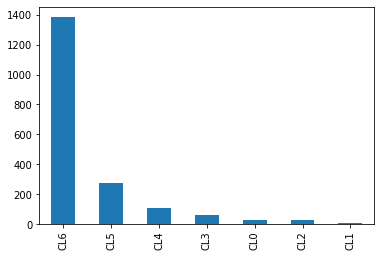

CL6    610
CL0    428
CL2    204
CL1    193
CL3    185
CL5    157
CL4    108
Name: Nicotine, dtype: int64


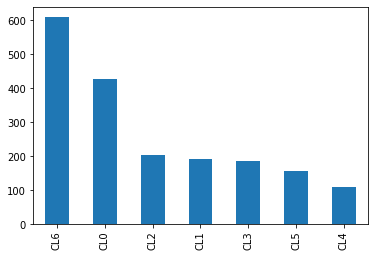

CL5    759
CL6    505
CL4    287
CL3    198
CL2     68
CL0     34
CL1     34
Name: Alcohol, dtype: int64


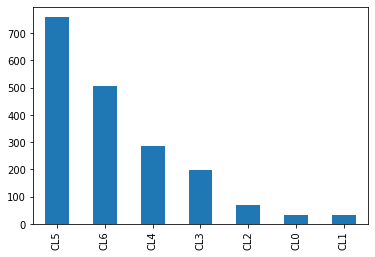

In [8]:
print(work_data['Meth'].value_counts())
work_data['Meth'].value_counts().plot(kind='bar')
plt.show()
print(work_data['Choc'].value_counts())
work_data['Choc'].value_counts().plot(kind='bar')
plt.show()
print(work_data['Caff'].value_counts())
work_data['Caff'].value_counts().plot(kind='bar')
plt.show() 
print(work_data['Nicotine'].value_counts())
work_data['Nicotine'].value_counts().plot(kind='bar')
plt.show()
print(work_data['Alcohol'].value_counts())
work_data['Alcohol'].value_counts().plot(kind='bar')
plt.show()

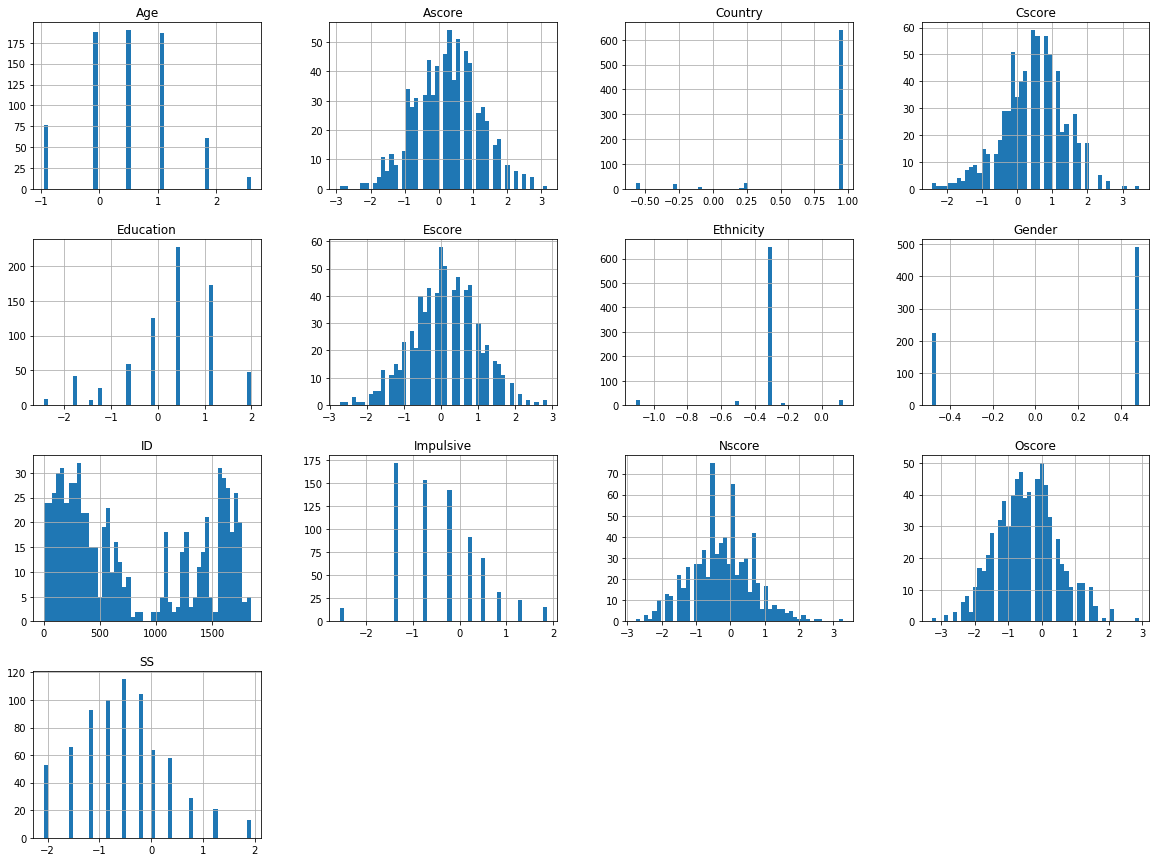

In [9]:
#Люди, которые использовали нелегальные вещества кроме мета более 10 лет назад или не использовавшие их вообще
healthy_or_meth = data
drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms',
       'Semer', 'VSA']
for i in drugs:
    healthy_or_meth = healthy_or_meth[(healthy_or_meth[i] == 'CL0') | (healthy_or_meth[i] == 'CL1') | (healthy_or_meth[i] == 'CL2')]
    

healthy_or_meth.hist(bins=50, figsize=(20 ,15))
plt.show()

CL0    694
CL1     13
CL2      9
Name: Heroin, dtype: int64


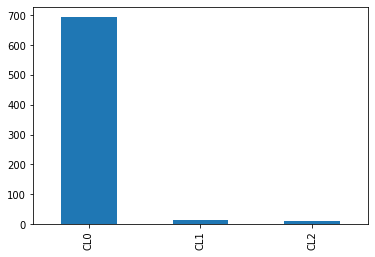

CL0    662
CL1     45
CL2      9
Name: VSA, dtype: int64


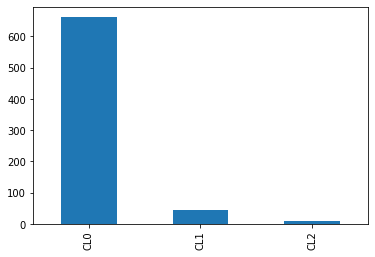

In [10]:
print(healthy_or_meth['Heroin'].value_counts())
healthy_or_meth['Heroin'].value_counts().plot(kind='bar')
plt.show()
print(healthy_or_meth['VSA'].value_counts())
healthy_or_meth['VSA'].value_counts().plot(kind='bar')
plt.show()

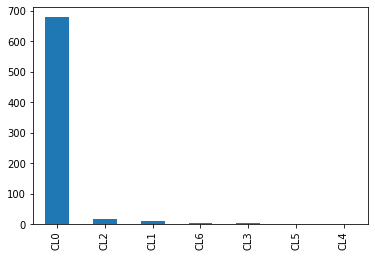

In [11]:
healthy_or_meth['Meth'].value_counts().plot(kind='bar')
plt.show()
#отсюда предположение: кто употреблял мет перешли на него с других веществ, или употребляет на ходу с другими веществами.
#для данного набора данных нет смысла делать модели. Слишком мало примеров людей использующих вещества

In [12]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameToNumPy(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, Х, y=None):
        return self
    
    def transform(self, Х):
        return X[self.attribute_names].values
    

In [13]:
def apply_pipeline(data, num_attributes, cat_attributes, encoder='ordinal'):
    X = data
    
    num_data_pipeline = Pipeline([
        ('selector', DataFrameToNumPy(num_attributes)),
    ])

    cat_data_pipeline = Pipeline([
        ('select', DataFrameToNumPy(cat_attributes)),
        ('cat_encode', OrdinalEncoder()),
    ])

    all_together = FeatureUnion(transformer_list=[
        ('num_pipe', num_data_pipeline),
        ('cat_pipe', cat_data_pipeline),
    ])

    
    return all_together.fit_transform(data)
 
    
num_attributes = ['Age', 'Gender', 'Education',  
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

#num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] #без психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']
X = data
prepared_data = apply_pipeline(data, num_attributes, cat_attributes)

print(prepared_data[0])
work_data.loc(0)[0]

[ 0.49788  0.48246 -0.05921  0.31287 -0.57545 -0.58331 -0.91699 -0.00665
 -0.21712 -1.18084  5.       6.       5.       0.       2.     ]


Age          0.49788
Gender       0.48246
Education   -0.05921
Nscore       0.31287
Escore      -0.57545
Oscore      -0.58331
Ascore      -0.91699
Cscore      -0.00665
Impulsive   -0.21712
SS          -1.18084
Alcohol          CL5
Caff             CL6
Choc             CL5
Meth             CL0
Nicotine         CL2
Name: 0, dtype: object

In [14]:
columns_for_df = work_data.columns
prepared_data_df = pd.DataFrame(prepared_data, columns = columns_for_df)

corr_matrix = prepared_data_df.corr()
corr_matrix['Meth'].sort_values()

Age         -0.191503
Cscore      -0.191380
Gender      -0.181489
Education   -0.170103
Ascore      -0.156847
Escore      -0.121708
Alcohol     -0.079022
Choc        -0.044426
Caff         0.023196
Oscore       0.171984
Impulsive    0.181524
Nscore       0.184672
SS           0.218884
Nicotine     0.220544
Meth         1.000000
Name: Meth, dtype: float64

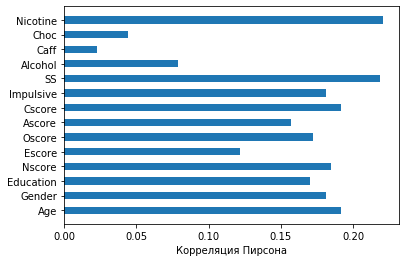

In [15]:
corr_matrix_res_names = columns_for_df.tolist()
corr_matrix_res_names.pop(-2)

N = len(corr_matrix_res_names)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence


    
corr_matrix_res = corr_matrix['Meth'].to_numpy().tolist()    
corr_matrix_res.pop(-2)

for i, elem in enumerate(corr_matrix_res):
    if elem < 0:
        corr_matrix_res[i] = -corr_matrix_res[i]
        
        
fig, ax = plt.subplots()

hbars = ax.barh(ind, corr_matrix_res, width)

ax.set_xlabel('Корреляция Пирсона')
ax.set_yticks(ind)
ax.set_yticklabels(corr_matrix_res_names)



plt.show()

In [16]:
prepared_data_df['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

CL0    1429
CL3     149
CL2      97
CL6      73
CL4      50
CL5      48
CL1      39
Name: Meth, dtype: int64


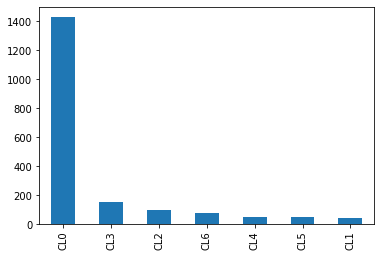

In [17]:
print(work_data['Meth'].value_counts())
work_data['Meth'].value_counts().plot(kind='bar')
plt.show()

# Создание простых моделей
На данном этапе будут обучены модели/ансамбли моделей на двух наборах данных (употреблявшие meth (в тч другие вещества) с психологическими тестами, без психологических тестов)

Используемые модели:
- XGBoost 
- LightGBM
- RandomForest
- Полносвязная нейронная сеть

In [18]:
#Проверка+разделение данных
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, multilabel_confusion_matrix, make_scorer, confusion_matrix

#Модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [15]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)


(1508, 15)
Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Caff', 'Choc', 'Meth',
       'Nicotine'],
      dtype='object')


In [16]:
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

In [17]:
class_weight_info = {0:1, 1:35, 2:18, 3:9, 4:31, 5:31, 6:20}

In [162]:
#Инициализация моделей
rand_forest = RandomForestClassifier(class_weight=class_weight_info)
perceptron = Perceptron(class_weight=class_weight_info)
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50,
                                learning_rate=0.1, n_estimators=3, max_depth=5,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2, class_weight=class_weight_info)
xgb_model = XGBClassifier(class_weight=class_weight_info)

rand_forest.fit(train_X, train_y)
perceptron.fit(train_X, train_y)
lgbm_model.fit(train_X, train_y)
xgb_model.fit(train_X, train_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[01:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight={0: 1, 1: 35, 2: 18, 3: 9, 4: 31, 5: 31, 6: 20},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [163]:
np.set_printoptions(precision=3)

In [19]:
def PrintScores(y_test, y_pred):
    print(multilabel_confusion_matrix(y_test, y_pred))
    #TN FP
    #FN TP (c0, c1, ..., c6)

    f1_res_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_res_allClasses = f1_score(y_test, y_pred, average=None)
    acc_res = accuracy_score(y_test, y_pred)
    prec_res = precision_score(y_test, y_pred, average='weighted')

    print('F1 взвешенный - {:.3f}'.format(f1_res_weighted))
    print('F1 по классам - ', f1_res_allClasses)
    print('accuracy - {:.3f}'.format(acc_res))
    print('precision - {:.3f}'.format(prec_res))
    return 0

In [166]:
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

[[[  7  84]
  [  1 285]]

 [[369   0]
  [  8   0]]

 [[356   2]
  [ 19   0]]

 [[344   3]
  [ 28   2]]

 [[367   0]
  [ 10   0]]

 [[366   1]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.669
F1 по классам -  [0.87  0.    0.    0.114 0.    0.    0.   ]
accuracy - 0.761
precision - 0.618


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [167]:
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 89   2]
  [231  55]]

 [[351  18]
  [  6   2]]

 [[102 256]
  [  2  17]]

 [[347   0]
  [ 30   0]]

 [[361   6]
  [ 10   0]]

 [[362   5]
  [ 10   0]]

 [[347  16]
  [ 14   0]]]
F1 взвешенный - 0.252
F1 по классам -  [0.321 0.143 0.116 0.    0.    0.    0.   ]
accuracy - 0.196
precision - 0.737


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [168]:
pred_y = lgbm_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 83   8]
  [165 121]]

 [[334  35]
  [  6   2]]

 [[272  86]
  [ 16   3]]

 [[320  27]
  [ 27   3]]

 [[323  44]
  [  6   4]]

 [[357  10]
  [  8   2]]

 [[334  29]
  [ 11   3]]]
F1 взвешенный - 0.468
F1 по классам -  [0.583 0.089 0.056 0.1   0.138 0.182 0.13 ]
accuracy - 0.366
precision - 0.732


0

In [169]:
pred_y = xgb_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[  7  84]
  [ 10 276]]

 [[368   1]
  [  8   0]]

 [[356   2]
  [ 19   0]]

 [[337  10]
  [ 27   3]]

 [[366   1]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.659
F1 по классам -  [0.854 0.    0.    0.14  0.    0.    0.   ]
accuracy - 0.740
precision - 0.600


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [176]:
parameters = {
    'n_estimators':[10, 20, 40, 70, 100],
    'criterion':('gini', 'entropy'),
    'max_depth':[3, 5, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 3, 7],
    'max_features':('sqrt', 'log2'),
    'random_state':[0],
    'class_weight':[{0:1, 1:35, 2:18, 3:9, 4:31, 5:31, 6:20}]
}
f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_randForest = GridSearchCV(rand_forest, parameters, scoring=f1scorer)

GSCV_randForest.fit(train_X, train_y)

rand_forest = GSCV_randForest.best_estimator_
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437:

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

[[[ 20  71]
  [ 27 259]]

 [[367   2]
  [  7   1]]

 [[352   6]
  [ 18   1]]

 [[323  24]
  [ 27   3]]

 [[361   6]
  [ 10   0]]

 [[363   4]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.654
F1 по классам -  [0.841 0.182 0.077 0.105 0.    0.    0.   ]
accuracy - 0.700
precision - 0.619


D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [178]:
GSCV_randForest.best_estimator_

RandomForestClassifier(bootstrap=True,
                       class_weight={0: 1, 1: 35, 2: 18, 3: 9, 4: 31, 5: 31,
                                     6: 20},
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [177]:
parameters = {
    'alpha':[0.0001, 0.000001, 0.0005, 0.001, 0.00000001],
    'penalty':('l2', 'l1', 'elasticnet'),
    'max_iter':[50, 1000, 2000, 20000],
    'tol':[0.0001, 0.00001],
    'n_iter_no_change':[20],
    'random_state':[0],
    'class_weight':[{0:1, 1:35, 2:18, 3:9, 4:31, 5:31, 6:20}]
}
#f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_perceptron = GridSearchCV(perceptron, parameters)#, scoring=f1scorer)

GSCV_perceptron.fit(train_X, train_y)

perceptron = GSCV_perceptron.best_estimator_
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.

[[[ 90   1]
  [272  14]]

 [[364   5]
  [  8   0]]

 [[ 52 306]
  [  3  16]]

 [[347   0]
  [ 30   0]]

 [[358   9]
  [ 10   0]]

 [[343  24]
  [  9   1]]

 [[362   1]
  [ 14   0]]]
F1 взвешенный - 0.077
F1 по классам -  [0.093 0.    0.094 0.    0.    0.057 0.   ]
accuracy - 0.082
precision - 0.712


D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [108]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] #без психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)

(1508, 10)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol', 'Caff',
       'Choc', 'Meth', 'Nicotine'],
      dtype='object')


In [109]:
print(test_set.shape)

(377, 10)


In [110]:
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

In [111]:
rand_forest = RandomForestClassifier()
perceptron = Perceptron()
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50,
                                learning_rate=0.1, n_estimators=3, max_depth=5,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
xgb_model = XGBClassifier()

rand_forest.fit(train_X, train_y)
perceptron.fit(train_X, train_y)
lgbm_model.fit(train_X, train_y)
xgb_model.fit(train_X, train_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[22:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [112]:
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 25  66]
  [ 27 259]]

 [[367   2]
  [  8   0]]

 [[349   9]
  [ 19   0]]

 [[329  18]
  [ 26   4]]

 [[363   4]
  [  9   1]]

 [[362   5]
  [ 10   0]]

 [[356   7]
  [ 12   2]]]
F1 взвешенный - 0.665
F1 по классам -  [0.848 0.    0.    0.154 0.133 0.    0.174]
accuracy - 0.706
precision - 0.633


0

In [113]:
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

[[[  7  84]
  [ 11 275]]

 [[369   0]
  [  8   0]]

 [[342  16]
  [ 17   2]]

 [[347   0]
  [ 30   0]]

 [[367   0]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.652
F1 по классам -  [0.853 0.    0.108 0.    0.    0.    0.   ]
accuracy - 0.735
precision - 0.587


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [114]:
pred_y = lgbm_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[  0  91]
  [  0 286]]

 [[369   0]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[347   0]
  [ 30   0]]

 [[367   0]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.654
F1 по классам -  [0.863 0.    0.    0.    0.    0.    0.   ]
accuracy - 0.759
precision - 0.576


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [115]:
pred_y = xgb_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 32  59]
  [ 33 253]]

 [[365   4]
  [  8   0]]

 [[346  12]
  [ 18   1]]

 [[325  22]
  [ 20  10]]

 [[363   4]
  [ 10   0]]

 [[364   3]
  [ 10   0]]

 [[355   8]
  [ 13   1]]]
F1 взвешенный - 0.674
F1 по классам -  [0.846 0.    0.062 0.323 0.    0.    0.087]
accuracy - 0.703
precision - 0.648


0

In [116]:
parameters = {
    'n_estimators':[10, 20, 40, 70, 100],
    'criterion':('gini', 'entropy'),
    'max_depth':[3, 5, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 3, 7],
    'max_features':('sqrt', 'log2'),
    'random_state':[0]
}
f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_randForest = GridSearchCV(rand_forest, parameters, scoring=f1scorer)

GSCV_randForest.fit(train_X, train_y)

rand_forest = GSCV_randForest.best_estimator_
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437:

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

[[[ 25  66]
  [ 23 263]]

 [[367   2]
  [  8   0]]

 [[352   6]
  [ 19   0]]

 [[330  17]
  [ 24   6]]

 [[361   6]
  [  9   1]]

 [[365   2]
  [ 10   0]]

 [[355   8]
  [ 14   0]]]
F1 взвешенный - 0.670
F1 по классам -  [0.855 0.    0.    0.226 0.118 0.    0.   ]
accuracy - 0.716
precision - 0.631


0

In [142]:
GSCV_randForest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [117]:
parameters = {
    'alpha':[0.0001, 0.000001, 0.0005, 0.001, 0.00000001],
    'penalty':('l2', 'l1', 'elasticnet'),
    'max_iter':[50, 1000, 2000, 20000],
    'tol':[0.0001, 0.00001],
    'n_iter_no_change':[20],
    'random_state':[0]
}
#f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_perceptron = GridSearchCV(perceptron, parameters)#, scoring=f1scorer)

GSCV_perceptron.fit(train_X, train_y)

perceptron = GSCV_perceptron.best_estimator_
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.

[[[  2  89]
  [  1 285]]

 [[369   0]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[347   0]
  [ 30   0]]

 [[365   2]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[362   1]
  [ 14   0]]]
F1 взвешенный - 0.655
F1 по классам -  [0.864 0.    0.    0.    0.    0.    0.   ]
accuracy - 0.756
precision - 0.578


D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

# Модель на Keras
## Ordinal кодировка категорий для Y

In [25]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)



#################
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

(1508, 15)
Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Caff', 'Choc', 'Meth',
       'Nicotine'],
      dtype='object')


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(14,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

In [64]:
metrics = [
        keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
    ]

In [65]:
sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9)

model.compile(optimizer=sgd_opt,
                      loss=['sparse_categorical_crossentropy'],
                      metrics=metrics)
history = model.fit(train_X, train_y, epochs=100)
    
print('sgd')
print(model.evaluate(test_X,  test_y, verbose=2))
print('_____________')

Epoch 1/100
1508/1508 [==============================] - 0s 133us/sample - loss: 1.2495 - categorical_accuracy: 0.5532
Epoch 2/100
1508/1508 [==============================] - 0s 54us/sample - loss: 0.9739 - categorical_accuracy: 0.8861
Epoch 3/100
1508/1508 [==============================] - 0s 52us/sample - loss: 0.9381 - categorical_accuracy: 0.9327
Epoch 4/100
1508/1508 [==============================] - 0s 54us/sample - loss: 0.9492 - categorical_accuracy: 0.9517
Epoch 5/100
1508/1508 [==============================] - 0s 55us/sample - loss: 0.9259 - categorical_accuracy: 0.9624
Epoch 6/100
1508/1508 [==============================] - 0s 55us/sample - loss: 0.9462 - categorical_accuracy: 0.9690
Epoch 7/100
1508/1508 [==============================] - 0s 57us/sample - loss: 0.9302 - categorical_accuracy: 0.9737
Epoch 8/100
1508/1508 [==============================] - 0s 54us/sample - loss: 0.9145 - categorical_accuracy: 0.9772
Epoch 9/100
1508/1508 [==============================] 

1508/1508 [==============================] - 0s 54us/sample - loss: 0.8502 - categorical_accuracy: 0.9912
Epoch 70/100
1508/1508 [==============================] - 0s 54us/sample - loss: 0.8580 - categorical_accuracy: 0.9913
Epoch 71/100
1508/1508 [==============================] - 0s 57us/sample - loss: 0.8627 - categorical_accuracy: 0.9913
Epoch 72/100
1508/1508 [==============================] - 0s 54us/sample - loss: 0.8613 - categorical_accuracy: 0.9913
Epoch 73/100
1508/1508 [==============================] - 0s 53us/sample - loss: 0.8492 - categorical_accuracy: 0.9914
Epoch 74/100
1508/1508 [==============================] - 0s 52us/sample - loss: 0.8606 - categorical_accuracy: 0.9914
Epoch 75/100
1508/1508 [==============================] - 0s 53us/sample - loss: 0.8494 - categorical_accuracy: 0.9914
Epoch 76/100
1508/1508 [==============================] - 0s 51us/sample - loss: 0.8538 - categorical_accuracy: 0.9914
Epoch 77/100
1508/1508 [==============================] - 0s 

In [66]:
pred_y = model.predict(test_X)
pred_y.shape

(377, 7)

In [67]:
new_y = np.ones(377)
for i, el_i in enumerate(pred_y):
    t_max = -1
    t_j = 0
    
    for j, el_j in enumerate(el_i):
        if el_j > t_max:
            t_max = el_j
            t_j = j
            
    new_y[i] = t_j
    
multilabel_confusion_matrix(test_y, new_y)
#TN FP
#FN TP

array([[[  0,  91],
        [  1, 285]],

       [[369,   0],
        [  8,   0]],

       [[358,   0],
        [ 19,   0]],

       [[346,   1],
        [ 30,   0]],

       [[367,   0],
        [ 10,   0]],

       [[367,   0],
        [ 10,   0]],

       [[363,   0],
        [ 14,   0]]], dtype=int64)

dict_keys(['loss', 'categorical_accuracy'])


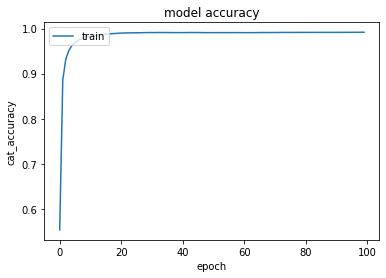

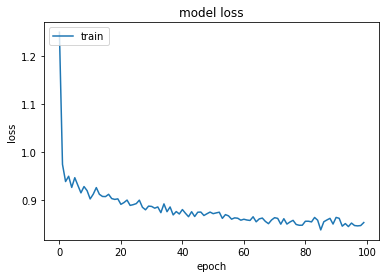

In [68]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('cat_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
for a in [0.001, 0.01,  0.2]:
    for n in [100, 200]:
        print(a)
        print(n)
        print('_____________')
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model.compile(optimizer=sgd_opt,
                      loss=['sparse_categorical_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        print('sgd')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        model.compile(optimizer=adam_opt,
                      loss=['sparse_categorical_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        print('adam')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        model.compile(optimizer=RMSprop_opt,
                      loss=['sparse_categorical_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        
        print('RMSprop')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')

0.001
100
_____________


NameError: name 'metrics' is not defined

In [254]:
for a in [0.001, 0.01,  0.2]:
    for n in [100, 200]:
        print(a)
        print(n)
        print('_____________')
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        
        model.compile(optimizer=sgd_opt,
                      loss=['mse'],
              metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        print('sgd')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        model.compile(optimizer=adam_opt,
                      loss=['mse'],
              metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        print('adam')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        model.compile(optimizer=RMSprop_opt,
                      loss=['mse'],
              metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        
        print('RMSprop')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')

0.001
100
_____________
sgd
377/377 - 1s - loss: 3.1490 - accuracy: 0.0531
[3.1490201026754607, 0.053112417]
_____________
adam
377/377 - 1s - loss: 3.1489 - accuracy: 0.0505
[3.1488660874354113, 0.050456643]
_____________
RMSprop
377/377 - 1s - loss: 3.1489 - accuracy: 0.0481
[3.1488662569212975, 0.048053816]
_____________
0.001
200
_____________
sgd
377/377 - 1s - loss: 3.1490 - accuracy: 0.0439
[3.14895118895513, 0.043879777]
_____________
adam
377/377 - 1s - loss: 3.1489 - accuracy: 0.0404
[3.148866474470346, 0.04037291]
_____________
RMSprop
377/377 - 1s - loss: 3.1489 - accuracy: 0.0374
[3.148866107672532, 0.037385102]
_____________
0.01
100
_____________
sgd
377/377 - 1s - loss: 3.1489 - accuracy: 0.0360
[3.1488751346932164, 0.03604951]
_____________
adam
377/377 - 1s - loss: 3.1489 - accuracy: 0.0348
[3.148867286484817, 0.034806054]
_____________
RMSprop
377/377 - 1s - loss: 3.1489 - accuracy: 0.0336
[3.1488659887794475, 0.033645514]
_____________
0.01
200
_____________
sgd
377

In [255]:
for a in [0.001, 0.01,  0.2]:
    for n in [100, 200]:
        print(a)
        print(n)
        print('_____________')
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        
        model.compile(optimizer=sgd_opt,
                      loss=['mae'],
              metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        print('sgd')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        model.compile(optimizer=adam_opt,
                      loss=['mae'],
              metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        print('adam')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(20, input_shape=(14,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(7, activation = 'softmax')
        ])
        model.compile(optimizer=RMSprop_opt,
                      loss=['mae'],
              metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        
        print('RMSprop')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')

0.001
100
_____________
sgd
377/377 - 1s - loss: 0.8962 - accuracy: 0.1070
[0.896172780889415, 0.10702336]
_____________
adam
377/377 - 1s - loss: 0.8962 - accuracy: 0.1047
[0.896172780889415, 0.10474514]
_____________
RMSprop
377/377 - 1s - loss: 0.8962 - accuracy: 0.1026
[0.8961727783597749, 0.10256186]
_____________
0.001
200
_____________
sgd
377/377 - 1s - loss: 0.8962 - accuracy: 0.0985
[0.8961727884783353, 0.09846237]
_____________
adam
377/377 - 1s - loss: 0.8962 - accuracy: 0.0947
[0.8961727884783353, 0.09467801]
_____________
RMSprop
377/377 - 1s - loss: 0.8962 - accuracy: 0.0912
[0.896172783419055, 0.09117377]
_____________
0.01
100
_____________
sgd
377/377 - 1s - loss: 0.8962 - accuracy: 0.0895
[0.8961727935376155, 0.08951512]
_____________
adam
377/377 - 1s - loss: 0.8962 - accuracy: 0.0879
[0.8961727884783353, 0.08791575]
_____________
RMSprop
377/377 - 1s - loss: 0.8962 - accuracy: 0.0864
[0.896172783419055, 0.08637253]
_____________
0.01
200
_____________
sgd
377/377 -

## One-hot кодировка для Y

In [20]:
#Подготовка hold-out(а) c one-hot encoding
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education',
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes_ord = ['Alcohol','Caff', 'Choc', 'Nicotine']
cat_attributes_oneHot = ['Meth']



In [21]:
X_train = data_train_set
y_train = pd.get_dummies(data_train_set.Meth, prefix='Meth')
X_train = X_train.drop(['Meth','Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms', 'Semer', 'VSA', 'Country', 'Ethnicity'], axis=1)

In [22]:
X_test = data_test_set
y_test = pd.get_dummies(data_test_set.Meth, prefix='Meth')
X_test = X_test.drop(['Meth','Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms', 'Semer', 'VSA', 'Country', 'Ethnicity'], axis=1)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(14,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(120, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(7, activation = 'relu')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
a = 0.4
sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.7)
adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

model.compile(optimizer=sgd_opt,
              loss=['categorical_crossentropy'],
              metrics=['precision', 'recall'])
history = model.fit(train_X, train_y, epochs=50)

ValueError: Unknown metric function:precision

In [261]:

print(model.evaluate(test_X,  test_y, verbose=2))

377/377 - 1s - loss: 33.1243 - acc: 0.0000e+00
[33.124266333542074, 0.0]


# Объединение классов
1. С0-С2 - не употребляли, или употребляли в течении последней декады
2. С3-С6 - остальные

In [25]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education',
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)



#################
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

(1508, 15)
Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Caff', 'Choc', 'Meth',
       'Nicotine'],
      dtype='object')


In [26]:
for i, elem in enumerate(train_y):
    if (train_y[i] <= 2):
        train_y[i] = 0
    else:
         train_y[i] = 1
            
for i, elem in enumerate(test_y):
    if (test_y[i] <= 2):
        test_y[i] = 0
    else:
         test_y[i] = 1

In [27]:
import collections
collections.Counter(train_y)

Counter({0.0: 1252, 1.0: 256})

0.001
100
_____________
sgd
377/377 - 0s - loss: 0.5597 - fn: 25573.2500 - fp: 264.0000 - tn: 125107.1641 - tp: 63.0000 - precision: 0.1927 - recall: 0.0025
[0.5596546397917467, 25573.25, 264.0, 125107.164, 63.0, 0.19266056, 0.0024574588]


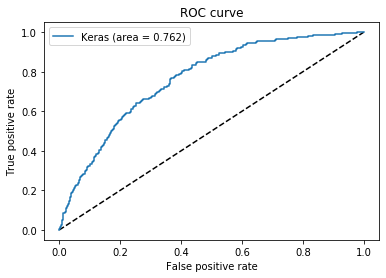

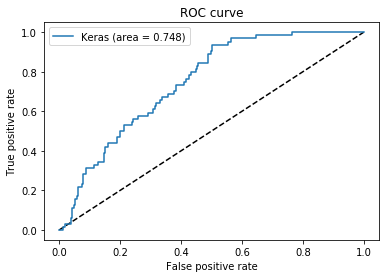

_____________
adam
377/377 - 0s - loss: 0.5684 - fn: 32761.0000 - fp: 24363.9160 - tn: 226520.2500 - tp: 18539.2500 - precision: 0.4321 - recall: 0.3614
[0.5683618548378072, 32761.0, 24363.916, 226520.25, 18539.25, 0.4321185, 0.3613871]


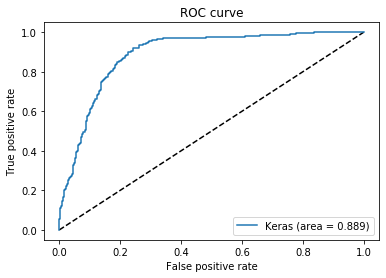

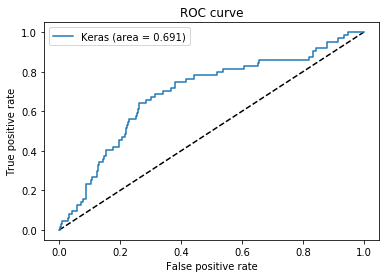

_____________
RMSprop
377/377 - 0s - loss: 0.5512 - fn: 40176.1680 - fp: 48871.0000 - tn: 327526.1562 - tp: 36788.0820 - precision: 0.4295 - recall: 0.4780
[0.5512489470151755, 40176.168, 48871.0, 327526.16, 36788.082, 0.42947093, 0.47798923]


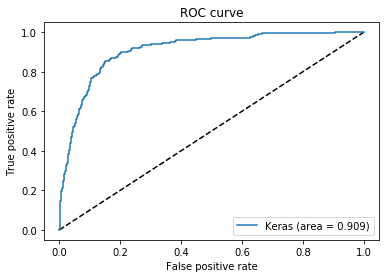

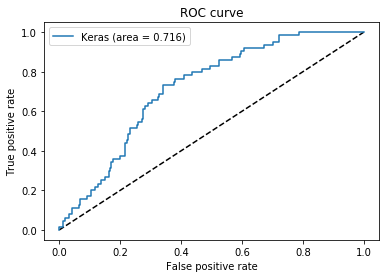

_____________
_____________
_____________
_____________
0.001
300
_____________
sgd
377/377 - 0s - loss: 0.4651 - fn: 81489.8359 - fp: 112378.0859 - tn: 639932.0625 - tp: 72338.4141 - precision: 0.3916 - recall: 0.4703
[0.4651086030809569, 81489.836, 112378.086, 639932.06, 72338.414, 0.3916186, 0.47025442]


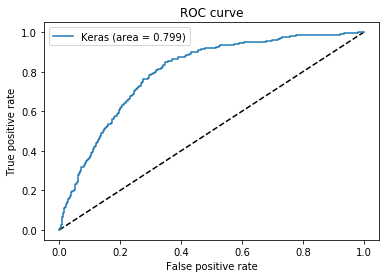

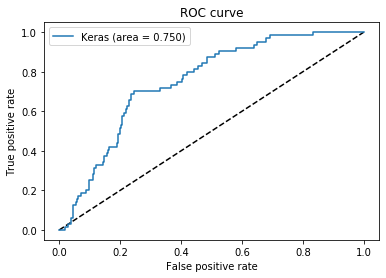

_____________
adam
377/377 - 0s - loss: 0.7364 - fn: 96887.3359 - fp: 171021.3281 - tn: 957201.8125 - tp: 133804.9219 - precision: 0.4390 - recall: 0.5800
[0.736379285389928, 96887.336, 171021.33, 957201.8, 133804.92, 0.4389547, 0.5800148]


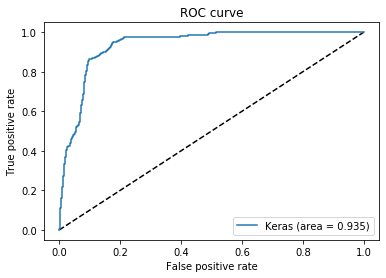

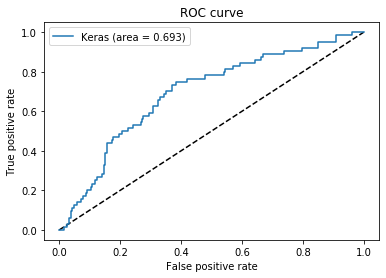

_____________
RMSprop
377/377 - 0s - loss: 1.1115 - fn: 112367.9141 - fp: 217025.1719 - tn: 1287111.0000 - tp: 195188.3281 - precision: 0.4735 - recall: 0.6346
[1.1115393903432538, 112367.914, 217025.17, 1287111.0, 195188.33, 0.47351274, 0.6346428]


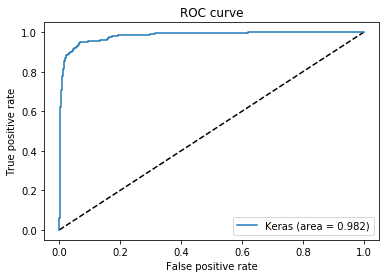

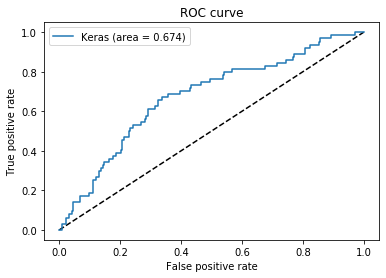

_____________
_____________
_____________
_____________
0.002
100
_____________
sgd
377/377 - 0s - loss: 0.4626 - fn: 129926.0000 - fp: 231978.3281 - tn: 1397670.8750 - tp: 203294.2500 - precision: 0.4671 - recall: 0.6101
[0.46262644377564244, 129926.0, 231978.33, 1397670.9, 203294.25, 0.46705043, 0.6100897]


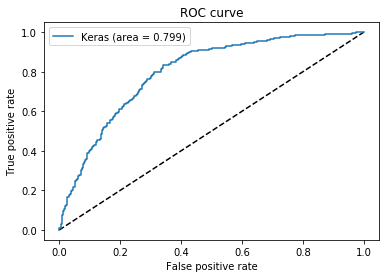

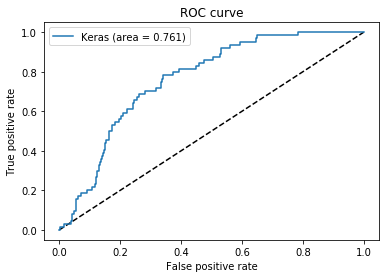

_____________
adam
377/377 - 0s - loss: 0.6442 - fn: 135642.0000 - fp: 257277.5781 - tn: 1497884.6250 - tp: 223242.2500 - precision: 0.4646 - recall: 0.6220
[0.6442337561823646, 135642.0, 257277.58, 1497884.6, 223242.25, 0.46458492, 0.6220452]


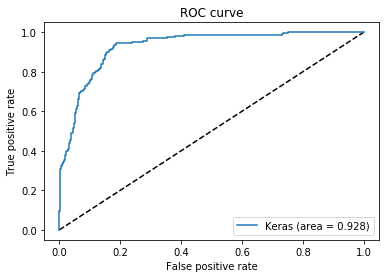

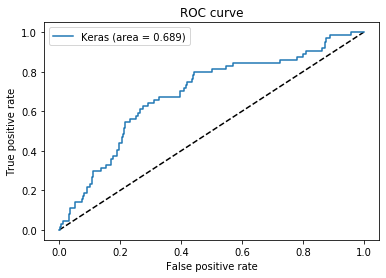

_____________
RMSprop
377/377 - 0s - loss: 0.9500 - fn: 142004.5781 - fp: 275872.9062 - tn: 1604802.1250 - tp: 242543.6719 - precision: 0.4679 - recall: 0.6307
[0.9500298971206503, 142004.58, 275872.9, 1604802.1, 242543.67, 0.46785474, 0.6307236]


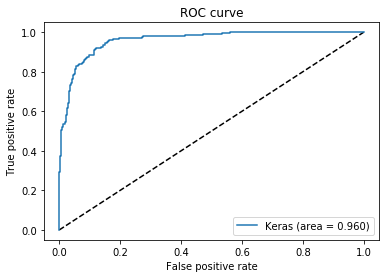

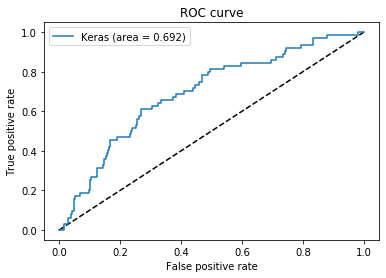

_____________
_____________
_____________
_____________
0.002
300
_____________
sgd
377/377 - 0s - loss: 0.4530 - fn: 172628.0000 - fp: 358952.5000 - tn: 1897635.6250 - tp: 288784.2500 - precision: 0.4458 - recall: 0.6259
[0.4530383063880455, 172628.0, 358952.5, 1897635.6, 288784.25, 0.44583583, 0.6258703]


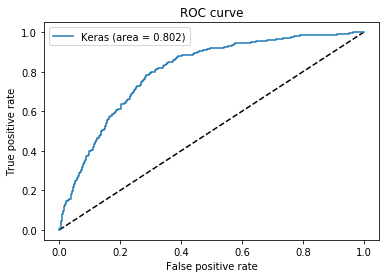

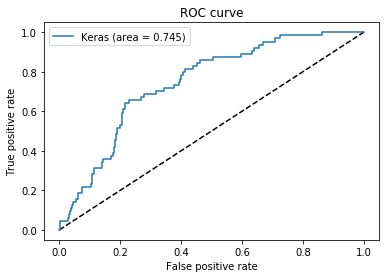

_____________
adam
377/377 - 0s - loss: 1.3244 - fn: 181435.6719 - fp: 396943.3438 - tn: 2235557.7500 - tp: 356840.5938 - precision: 0.4734 - recall: 0.6629
[1.3243539598955716, 181435.67, 396943.34, 2235557.8, 356840.6, 0.47339904, 0.6629321]


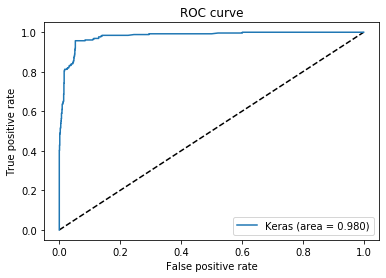

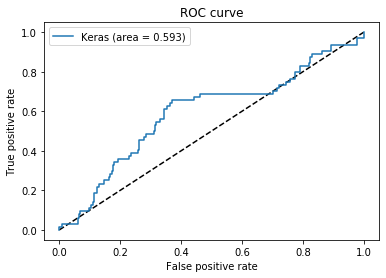

_____________
RMSprop
377/377 - 0s - loss: 1.5347 - fn: 193286.0781 - fp: 439229.1562 - tn: 2569185.2500 - tp: 421854.1562 - precision: 0.4899 - recall: 0.6858
[1.5347451385831958, 193286.08, 439229.16, 2569185.2, 421854.16, 0.48991096, 0.6857853]


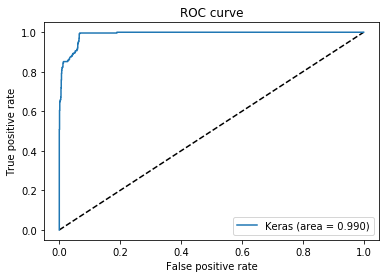

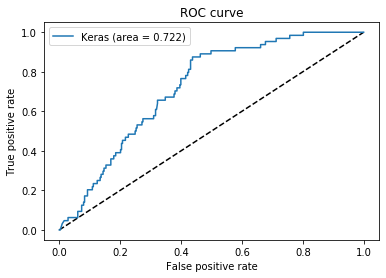

_____________
_____________
_____________
_____________
0.005
100
_____________
sgd
377/377 - 0s - loss: 0.5108 - fn: 206219.1719 - fp: 462276.9062 - tn: 2671650.2500 - tp: 434585.0938 - precision: 0.4846 - recall: 0.6782
[0.5108070775906034, 206219.17, 462276.9, 2671650.2, 434585.1, 0.4845619, 0.6781869]


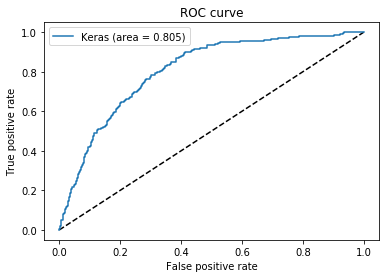

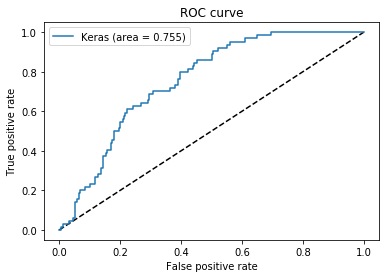

_____________
adam
377/377 - 0s - loss: 0.6011 - fn: 211798.9219 - fp: 485175.7500 - tn: 2774264.2500 - tp: 454669.3438 - precision: 0.4838 - recall: 0.6822
[0.6010796047490219, 211798.92, 485175.75, 2774264.2, 454669.34, 0.4837705, 0.6822071]


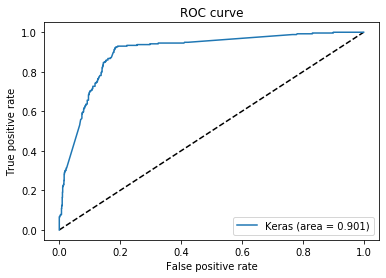

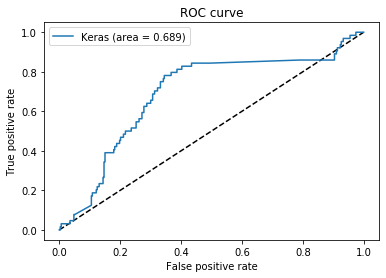

_____________
RMSprop
377/377 - 0s - loss: 0.9470 - fn: 217531.5781 - fp: 500238.8438 - tn: 2884714.7500 - tp: 474600.6562 - precision: 0.4869 - recall: 0.6857
[0.9470454561931702, 217531.58, 500238.84, 2884714.8, 474600.66, 0.4868501, 0.68570805]


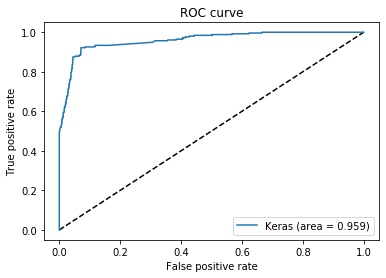

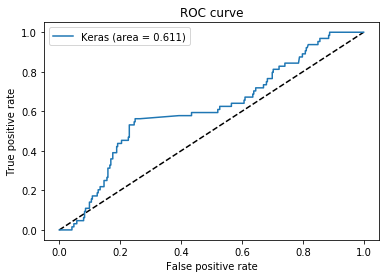

_____________
_____________
_____________
_____________
0.005
300
_____________
sgd
377/377 - 0s - loss: 0.4532 - fn: 248108.4219 - fp: 577234.1875 - tn: 3183632.0000 - tp: 520887.8438 - precision: 0.4743 - recall: 0.6774
[0.4532342744442765, 248108.42, 577234.2, 3183632.0, 520887.84, 0.47434425, 0.6773607]


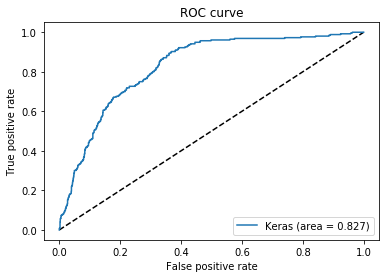

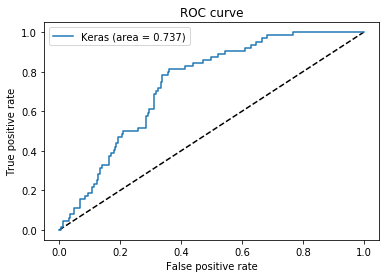

_____________
adam
377/377 - 0s - loss: 0.9684 - fn: 259219.0000 - fp: 611043.9375 - tn: 3525735.2500 - tp: 586641.2500 - precision: 0.4898 - recall: 0.6935
[0.9683802994239867, 259219.0, 611043.94, 3525735.2, 586641.25, 0.48981258, 0.6935439]


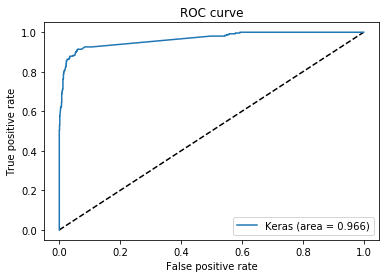

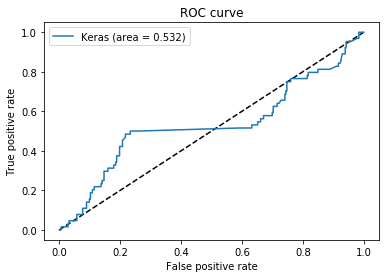

_____________
RMSprop
377/377 - 0s - loss: 1.0890 - fn: 268553.3438 - fp: 633219.3125 - tn: 3879472.7500 - tp: 654170.9375 - precision: 0.5081 - recall: 0.7090
[1.0890402493489515, 268553.34, 633219.3, 3879472.8, 654170.94, 0.5081372, 0.708956]


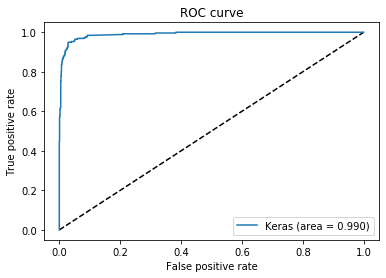

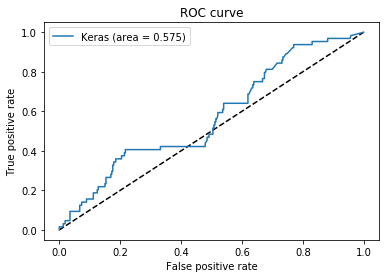

_____________
_____________
_____________
_____________
0.01
100
_____________
sgd
377/377 - 0s - loss: 0.5510 - fn: 280735.5938 - fp: 658406.7500 - tn: 3979798.2500 - tp: 667652.6875 - precision: 0.5035 - recall: 0.7040
[0.5510439044284567, 280735.6, 658406.75, 3979798.2, 667652.7, 0.5034862, 0.70398664]


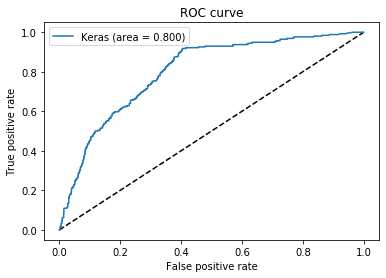

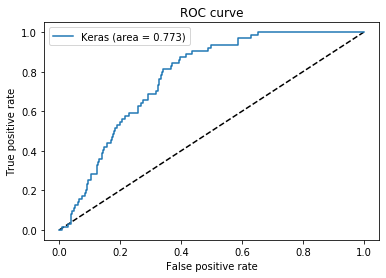

_____________
adam
377/377 - 0s - loss: 0.4472 - fn: 289939.3438 - fp: 688400.9375 - tn: 4075317.0000 - tp: 684112.9375 - precision: 0.4984 - recall: 0.7023
[0.4471870950899959, 289939.34, 688400.94, 4075317.0, 684112.94, 0.49843788, 0.702337]


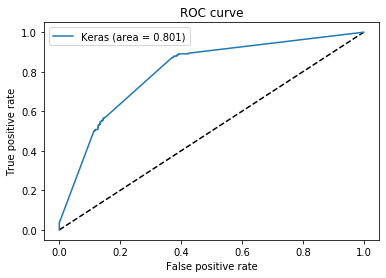

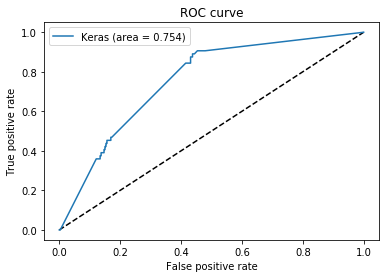

_____________
RMSprop
377/377 - 0s - loss: 0.4873 - fn: 297695.9062 - fp: 711874.7500 - tn: 4177356.7500 - tp: 702020.3125 - precision: 0.4965 - recall: 0.7022
[0.48729613067616834, 297695.9, 711874.75, 4177356.8, 702020.3, 0.49651518, 0.70221955]


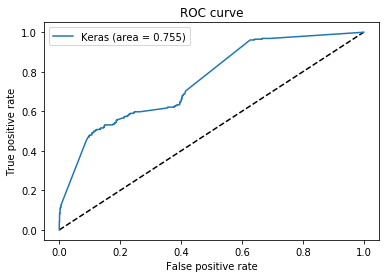

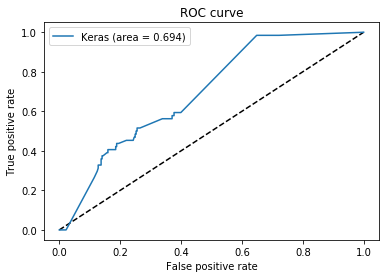

_____________
_____________
_____________
_____________
0.01
300
_____________
sgd
377/377 - 0s - loss: 0.5074 - fn: 325907.9062 - fp: 786432.8125 - tn: 4478711.5000 - tp: 750672.3125 - precision: 0.4884 - recall: 0.6973
[0.5074019390170706, 325907.9, 786432.8, 4478711.5, 750672.3, 0.4883676, 0.6972749]


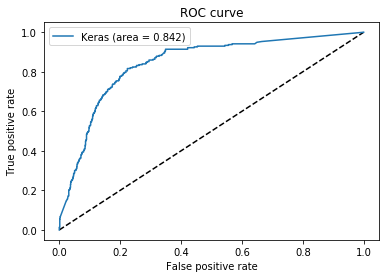

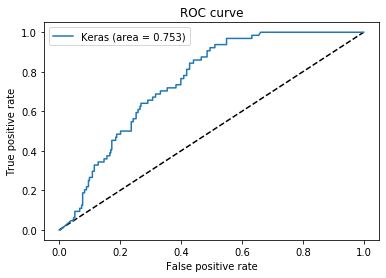

_____________
adam
377/377 - 1s - loss: 0.4871 - fn: 352631.8438 - fp: 874727.3125 - tn: 4766330.0000 - tp: 800812.4375 - precision: 0.4779 - recall: 0.6943
[0.48707968858255946, 352631.84, 874727.3, 4766330.0, 800812.44, 0.47794294, 0.69427925]


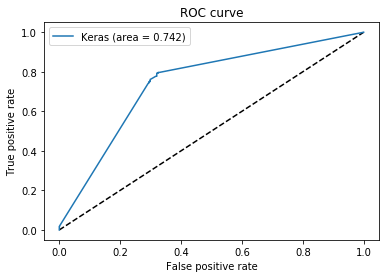

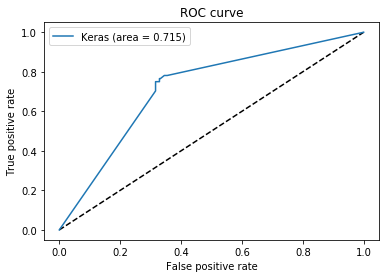

_____________
RMSprop
377/377 - 1s - loss: 0.4621 - fn: 376846.3438 - fp: 921340.7500 - tn: 5095629.5000 - tp: 853461.9375 - precision: 0.4809 - recall: 0.6937
[0.4621337610309257, 376846.34, 921340.75, 5095629.5, 853461.94, 0.48087707, 0.69369763]


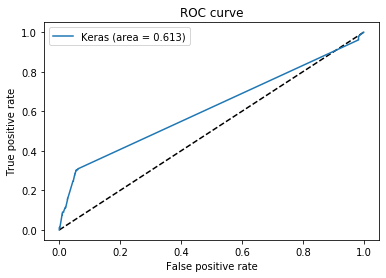

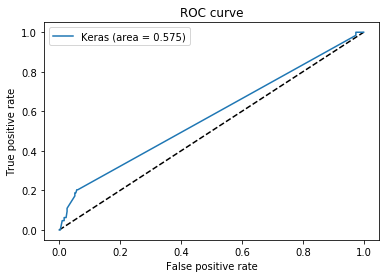

_____________
_____________
_____________
_____________


In [47]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

weight_for_0 = 1
weight_for_1 = 3
class_weight = {0: weight_for_0, 1: weight_for_1}

for a in [0.001, 0.002, 0.005, 0.01]:
    for n in [100, 300]:
        print(a)
        print(n)
        print('_____________')
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(60, input_shape=(14,)),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])
        
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model.compile(optimizer=sgd_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0,
                      class_weight=class_weight)
        
        print('sgd')
        print(model.evaluate(test_X,  test_y, verbose=2))
        pred_y_data = model.predict(train_X)
        draw_roc_auc(train_y, pred_y_data)
        pred_y_data = model.predict(test_X)
        draw_roc_auc(test_y, pred_y_data)
        print('_____________')
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(60, input_shape=(14,)),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])
        model.compile(optimizer=adam_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0,
                      class_weight=class_weight)
        
        print('adam')
        print(model.evaluate(test_X,  test_y, verbose=2))
        pred_y_data = model.predict(train_X)
        draw_roc_auc(train_y, pred_y_data)
        pred_y_data = model.predict(test_X)
        draw_roc_auc(test_y, pred_y_data)
        print('_____________')
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(60, input_shape=(14,)),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])
        model.compile(optimizer=RMSprop_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0,
                      class_weight=class_weight)
        
        print('RMSprop')
        print(model.evaluate(test_X,  test_y, verbose=2))
        pred_y_data = model.predict(train_X)
        draw_roc_auc(train_y, pred_y_data)
        pred_y_data = model.predict(test_X)
        draw_roc_auc(test_y, pred_y_data)
        print('_____________')
        print('_____________')
        print('_____________')
        print('_____________')

In [81]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(60, input_shape=(14,)),
            tf.keras.layers.Dense(70, activation = 'softmax'),
            tf.keras.layers.Dense(30, activation = 'sigmoid'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])

sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)

model.compile(optimizer=sgd_opt,
                      loss=['binary_crossentropy'],
              metrics=metrics)
model.fit(train_X, train_y, epochs=300, verbose=0,
                      class_weight=class_weight)

print('sgd')      
print(model.evaluate(test_X,  test_y, verbose=2))

print('_____________')
        
pred_y = model.predict(test_X)

sgd
377/377 - 1s - loss: 0.5570 - fn: 403255.2500 - fp: 996808.2500 - tn: 5396075.0000 - tp: 903917.0000 - precision: 0.4756 - recall: 0.6915
[0.5569986624331942, 403255.25, 996808.25, 5396075.0, 903917.0, 0.47556424, 0.6915056]
_____________


In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier


def draw_roc_auc(real_data, pred_data):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(real_data.reshape(-1), pred_data)
    auc_keras = auc(fpr_keras, tpr_keras)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return 0

In [83]:

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y.reshape(-1), pred_y)


auc_keras = auc(fpr_keras, tpr_keras)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_X, train_y)

y_pred_rf = rf.predict_proba(test_X)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y.reshape(-1), y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

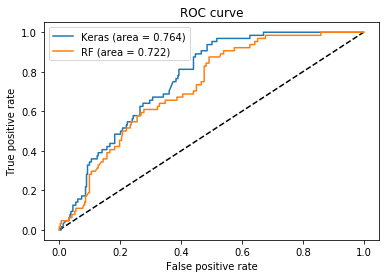

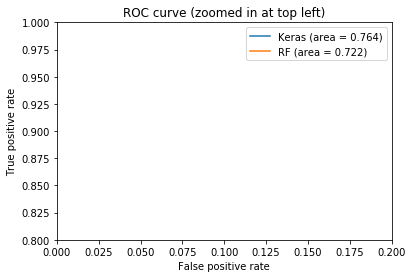

In [84]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [86]:
pred_y = model.predict_classes(test_X)
print(confusion_matrix(test_y, pred_y))
#TN FP
#FN TP

[[223  90]
 [ 23  41]]


In [39]:
pred_y = model.predict(train_X)

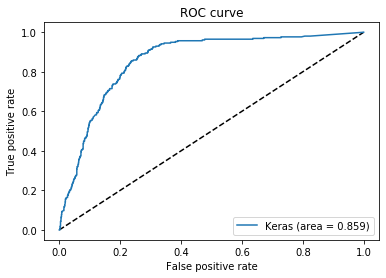

0

In [40]:
draw_roc_auc(train_y, pred_y)

In [41]:
pred_y = model.predict_classes(train_X)
print(confusion_matrix(train_y, pred_y))

[[961 291]
 [ 40 216]]


In [298]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB"
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [301]:
model.save('nn_binary_classifier')

In [49]:
from joblib import dump, load

#dump(rf, 'rf_binary_classifier.joblib') 

In [51]:
old_model = load('rf_binary_classifier.joblib')

In [92]:
pred_y = (old_model.predict_proba(test_X)[:,1] >= 0.189).astype(bool)
print(confusion_matrix(test_y, pred_y))

[[218  95]
 [ 16  48]]


In [60]:
pred_y

array([[0.77945904, 0.22054096],
       [0.63131917, 0.36868083],
       [0.63086284, 0.36913716],
       [0.78146502, 0.21853498],
       [0.69901038, 0.30098962],
       [0.94797656, 0.05202344],
       [0.7382978 , 0.2617022 ],
       [0.77553377, 0.22446623],
       [0.65793969, 0.34206031],
       [0.94797656, 0.05202344],
       [0.66936443, 0.33063557],
       [0.94227183, 0.05772817],
       [0.93455736, 0.06544264],
       [0.71308057, 0.28691943],
       [0.79202216, 0.20797784],
       [0.69540104, 0.30459896],
       [0.8749905 , 0.1250095 ],
       [0.88927175, 0.11072825],
       [0.84940746, 0.15059254],
       [0.78265375, 0.21734625],
       [0.93725894, 0.06274106],
       [0.7450257 , 0.2549743 ],
       [0.87468294, 0.12531706],
       [0.81216227, 0.18783773],
       [0.72347188, 0.27652812],
       [0.86479544, 0.13520456],
       [0.91816711, 0.08183289],
       [0.89911817, 0.10088183],
       [0.89709368, 0.10290632],
       [0.84904273, 0.15095727],
       [0.

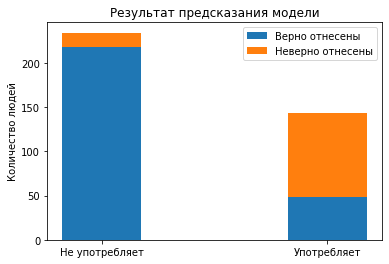

In [95]:
labels = ['Не употребляет', 'Употребляет']
#[[218  95]  TP FN
# [ 16  48]] FP TN

true_labels = [218, 48]
false_labels = [16, 95]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, true_labels, width,  label='Верно отнесены')
ax.bar(labels, false_labels, width, label='Неверно отнесены', bottom=true_labels)

ax.set_ylabel('Количество людей')
ax.set_title('Результат предсказания модели')
ax.legend()

plt.show()

In [87]:
g <- data.frame(confusion_matrix(train_y, pred_y)[,1:2]) %>% 
tibble::rownames_to_column("observed") %>% 
pivot_longer(-observed,names_to = "predicted") %>% 
ggplot() + geom_col(aes(x=observed,y=value,fill=predicted))
print(g)

SyntaxError: invalid syntax (<ipython-input-87-237cd3dac96a>, line 1)

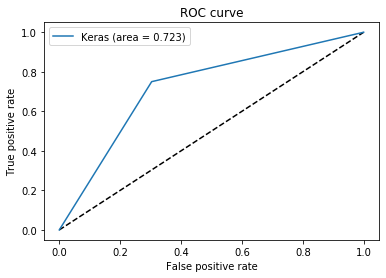

0

In [96]:
draw_roc_auc(test_y, pred_y)